In [1]:
import os

# Download human genome from ensembl

From [Ensembl](https://www.ensembl.org/info/data/ftp/index.html), we can download each chromosome:

In [10]:
url = 'ftp://ftp.ensembl.org/pub/release-96/fasta/homo_sapiens/dna/Homo_sapiens.GRCh38.dna.chromosome.{0}.fa.gz'

In [12]:
chromosome_list = list(range(1, 23)) + ['X', 'Y', 'MT']

In [8]:
url = 'ftp://ftp.ensembl.org/pub/release-96/fasta/homo_sapiens/dna/Homo_sapiens.GRCh38.dna.chromosome.{0}.fa.gz'

chromosome_list = list(range(1, 23)) + ['X', 'Y', 'MT']

for chrom in chromosome_list:
    print('downloading chromsome {}'.format(chrom))
    os.system(('wget -O /scratch/chrom{0}.fa.gz ' + url).format(chrom))

downloading chromsome 1
downloading chromsome 2
downloading chromsome 3
downloading chromsome 4
downloading chromsome 5
downloading chromsome 6
downloading chromsome 7
downloading chromsome 8
downloading chromsome 9
downloading chromsome 10
downloading chromsome 11
downloading chromsome 12
downloading chromsome 13
downloading chromsome 14
downloading chromsome 15
downloading chromsome 16
downloading chromsome 17
downloading chromsome 18
downloading chromsome 19
downloading chromsome 20
downloading chromsome 21
downloading chromsome 22
downloading chromsome X
downloading chromsome Y
downloading chromsome MT


Uncompress chromosomes files

In [14]:
for chrom in chromosome_list:
    os.system('gunzip /scratch/chrom{0}.fa.gz'.format(chrom))

Explore the file in FASTA format

In [18]:
! head /scratch/chromMT.fa

>MT dna:chromosome chromosome:GRCh38:MT:1:16569:1 REF
GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCCATGCATTTGGTATTTT
CGTCTGGGGGGTATGCACGCGATAGCATTGCGAGACGCTGGAGCCGGAGCACCCTATGTC
GCAGTATCTGTCTTTGATTCCTGCCTCATCCTATTATTTATCGCACCTACGTTCAATATT
ACAGGCGAACATACTTACTAAAGTGTGTTAATTAATTAATGCTTGTAGGACATAATAATA
ACAATTGAATGTCTGCACAGCCACTTTCCACACAGACATCATAACAAAAAATTTCCACCA
AACCCCCCCTCCCCCGCTTCTGGCCACAGCACTTAAACACATCTCTGCCAAACCCCAAAA
ACAAAGAACCCTAACACCAGCCTAACCAGATTTCAAATTTTATCTTTTGGCGGTATGCAC
TTTTAACAGTCACCCCCCAACTAACACATTATTTTCCCCTCCCACTCCCATACTACTAAT
CTCATCAATACAACCCCCGCCCATCCTACCCAGCACACACACACCGCTGCTAACCCCATA


Load all chromosomes into a python dictionary

In [22]:
genome = {}
for chrom in chromosome_list:
    genome[chrom] = ''
    fh = open('/scratch/chrom{0}.fa'.format(chrom))
    _ = next(fh)  # skip the header
    genome[chrom] = ''.join(line.strip() for line in fh)

Check chromosome sizes

In [23]:
for chrom in chromosome_list:
    print('{:3} {}'.format(chrom, len(genome[chrom])))

  1 248956422
  2 242193529
  3 198295559
  4 190214555
  5 181538259
  6 170805979
  7 159345973
  8 145138636
  9 138394717
 10 133797422
 11 135086622
 12 133275309
 13 114364328
 14 107043718
 15 101991189
 16 90338345
 17 83257441
 18 80373285
 19 58617616
 20 64444167
 21 46709983
 22 50818468
X   156040895
Y   57227415
MT  16569


## plot chromosome length

In [65]:
from matplotlib import pyplot as plt
import matplotlib as mpl

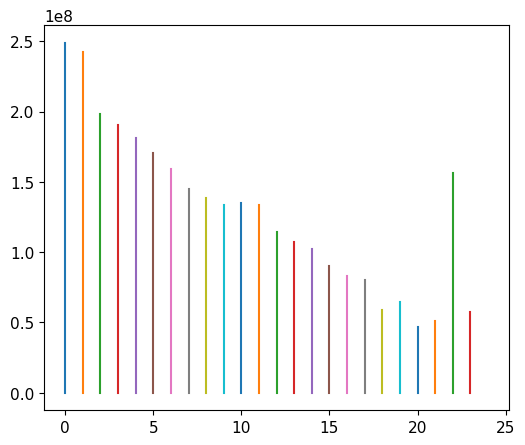

In [27]:
for n, chrom in enumerate(chromosome_list):
    plt.plot([n, n], [0, len(genome[chrom])])

Longest chromosome is 250 Mb

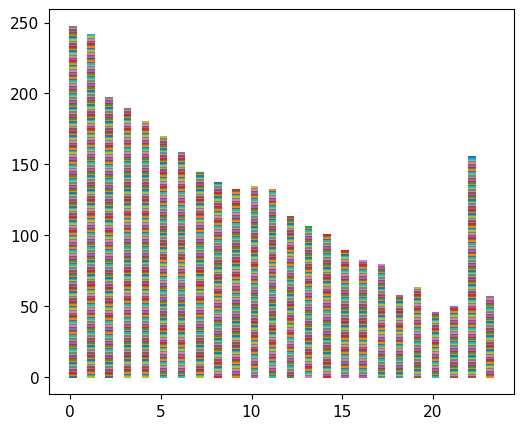

In [42]:
reso = 1000000

for n, chrom in enumerate(chromosome_list):
    for y in range(int(len(genome[chrom]) / reso)):
        plt.plot([n, n + 0.3], [y, y])

Each colored line, represents 1 milion nucleotides... just like A game of thrones first book.

## GC content

Distribution of sizes

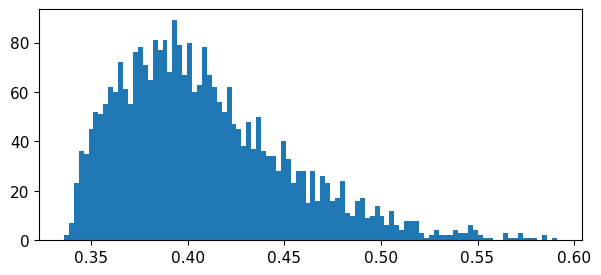

In [85]:
plt.figure(figsize=(7, 2))

gcs = []
for n, chrom in enumerate(chromosome_list):
    for y in range(int(len(genome[chrom]) / reso)):
        sub_seq = genome[chrom][y * reso:(y + 1) * reso]
        gc = sub_seq.count('C') + sub_seq.count('G')
        ns = sub_seq.count('N')
        try:
            gcs.append(gc / (reso - ns))
        except ZeroDivisionError:
            continue

_ = plt.hist(gcs, bins=100)

In [57]:
max_gc, min_gc = max(gcs), min(gcs)
diff_gc = max_gc - min_gc
print(min_gc, max_gc, diff_gc)

0.335929 0.591156 0.25522700000000004


Plot different GC contents

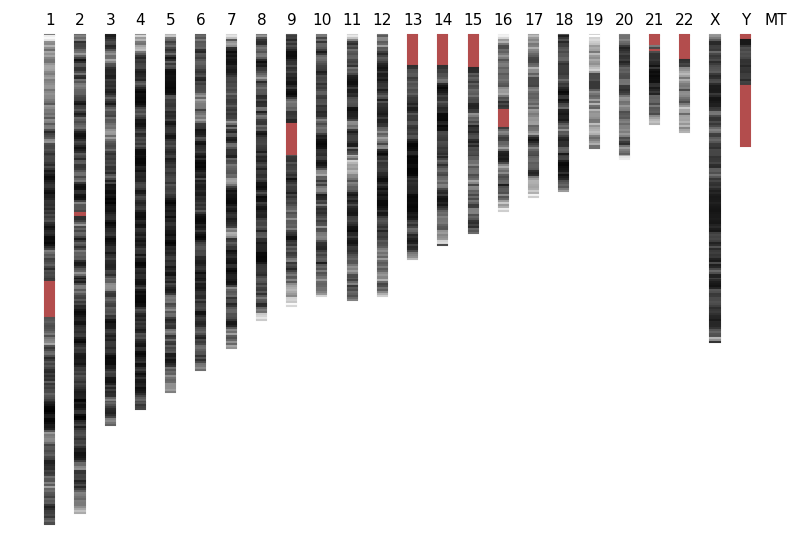

In [84]:
plt.figure(figsize=(10, 7))

# maximum percentage of Ns allowed
max_ns = reso * 0.3

for n, chrom in enumerate(chromosome_list):
    for y in range(int(len(genome[chrom]) / reso)):
        sub_seq = genome[chrom][y * reso:(y + 1) * reso]
        gc = sub_seq.count('C') + sub_seq.count('G')
        ns = sub_seq.count('N')
        if ns > max_ns:
            cs = (0.7, 0.3, 0.3)
        else:
            c = gc / (reso - ns)
            # rescale GC
            c -= min_gc
            c /= diff_gc
            cs = (c, c, c)        
        plt.plot([n, n + 0.3], [-y, -y], color=cs)
    plt.text(n + 0.15, 5, chrom, ha='center')

_ = plt.axis('off')

Just like typical karyotype image:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/NHGRI_human_male_karyotype.png/765px-NHGRI_human_male_karyotype.png)